In [1]:
%pip install beautifulsoup4


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import os
from bs4 import BeautifulSoup

In [34]:
train = pd.read_csv(os.getcwd()+"/stack_stats_2020_train.csv")
test = pd.read_csv(os.getcwd()+'/stack_stats_2020_test.csv')

In [35]:
train_id = train['Id']
test_id = train['Id']

In [49]:
train

,Id,Score,Body,Title,Tags
0,495560,1,<p>I have a set of data that I am transforming...,R: emmeans back tranform clr data using clrInv,<r><mixed-model><linear><lsmeans>
1,489896,0,<p>We are sending a one bit message to someone...,Trying to determine the failure rate of redund...,<probability><python>
2,497951,2,<p>I am aware that there is a similar post: <a...,How to derive categorical cross entropy update...,<logistic><cross-entropy>
3,478542,2,<p>I have a Poisson distributed glm where I ha...,"Learning more about glm parameters, how to dig...",<generalized-linear-model><interpretation>
4,458388,0,<p>1) how do i decide which transformation or ...,Is there I guide to decide which transformatio...,<python><data-transformation><dataset><feature...
...,...,...,...,...,...
19242,464995,0,<p>I'm currently trying to implement a decisio...,How does decision tree classify tuple whose co...,<classification><cart>
19243,477516,0,<p>What are the available tools (results) that...,What are the available tools (results) that ca...,<convergence><asymptotics><central-limit-theor...
19244,461894,1,"<p>Let <span class=""math-container"">$X^n=(X_1,...",Maximum Likelihood Estimator for Censored Data,<estimation><maximum-likelihood><censoring>
19245,498148,0,<p>I have a data set of property sales where i...,Can you use a single missingness indicator for...,<missing-data><data-preprocessing><indicator-f...


In [57]:
df = pd.concat([train,test],axis=0,ignore_index=True)


In [58]:
df.head()

,Id,Score,Body,Title,Tags
0,495560,1,<p>I have a set of data that I am transforming...,R: emmeans back tranform clr data using clrInv,<r><mixed-model><linear><lsmeans>
1,489896,0,<p>We are sending a one bit message to someone...,Trying to determine the failure rate of redund...,<probability><python>
2,497951,2,<p>I am aware that there is a similar post: <a...,How to derive categorical cross entropy update...,<logistic><cross-entropy>
3,478542,2,<p>I have a Poisson distributed glm where I ha...,"Learning more about glm parameters, how to dig...",<generalized-linear-model><interpretation>
4,458388,0,<p>1) how do i decide which transformation or ...,Is there I guide to decide which transformatio...,<python><data-transformation><dataset><feature...


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27496 entries, 0 to 27495
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      27496 non-null  int64 
 1   Score   27496 non-null  int64 
 2   Body    27496 non-null  object
 3   Title   27496 non-null  object
 4   Tags    27496 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


**Pre-Processing**
Applying Beautifulsoup.get_text() to all body elements. Removing '\n' characters

In [61]:
df["Body"][0]

'<p>I have a set of data that I am transforming using the <code>clr</code> function</p>\n<pre><code>library(compositions)\nclr(my_data)\n</code></pre>\n<p>Now I used <code>lmer</code> to build mixed effect linear models and I am extracting the estimated means and the contrasts using <code>emmeans</code>. I am aware of the options that can be used to back-transform the data</p>\n<p>e.g.</p>\n<pre><code>  model.rg &lt;- update(ref_grid(model), tran =  &quot;asin.sqrt&quot;)\n  emm1&lt;-emmeans(model.rg, specs = ~ drug:age:time, type = &quot;response&quot;)\n</code></pre>\n<p>However, I cannot figure out how to back-transform the data CLR transformed.\nAny idea how could I achieve the back-transformation within <code>emmeans</code>?</p>\n<p>Thank you</p>\n'

In [62]:
BeautifulSoup(df["Body"][0]).get_text()

'I have a set of data that I am transforming using the clr function\nlibrary(compositions)\nclr(my_data)\n\nNow I used lmer to build mixed effect linear models and I am extracting the estimated means and the contrasts using emmeans. I am aware of the options that can be used to back-transform the data\ne.g.\n  model.rg <- update(ref_grid(model), tran =  "asin.sqrt")\n  emm1<-emmeans(model.rg, specs = ~ drug:age:time, type = "response")\n\nHowever, I cannot figure out how to back-transform the data CLR transformed.\nAny idea how could I achieve the back-transformation within emmeans?\nThank you\n'

In [63]:
def transform(c) :
    i=0
    a = ''
    while i<len(c)-1 : 
        if c[i] == '\n':
            pass
        else : a+=c[i]
        i+=1
    return a

In [64]:
transform(BeautifulSoup(df["Body"][0]).get_text())

'I have a set of data that I am transforming using the clr functionlibrary(compositions)clr(my_data)Now I used lmer to build mixed effect linear models and I am extracting the estimated means and the contrasts using emmeans. I am aware of the options that can be used to back-transform the datae.g.  model.rg <- update(ref_grid(model), tran =  "asin.sqrt")  emm1<-emmeans(model.rg, specs = ~ drug:age:time, type = "response")However, I cannot figure out how to back-transform the data CLR transformed.Any idea how could I achieve the back-transformation within emmeans?Thank you'

In [66]:
df["Body"] = [transform(BeautifulSoup(df["Body"][i]).get_text()) for i in range(df.shape[0])]

In [67]:
from string import punctuation

def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])
    
    return no_punct

In [68]:
def transform_df(df,cols) :
    for col in cols :
        text = df[col]
        text_lower = text.str.lower()
        text_no_punc = text_lower.apply(remove_punctuation)
        df["new_"+col] = text_no_punc
    return df

In [69]:
df_transform = transform_df(df,["Body","Title","Tags"])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27496 entries, 0 to 27495
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         27496 non-null  int64 
 1   Score      27496 non-null  int64 
 2   Body       27496 non-null  object
 3   Title      27496 non-null  object
 4   Tags       27496 non-null  object
 5   new_Body   27496 non-null  object
 6   new_Title  27496 non-null  object
 7   new_Tags   27496 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.7+ MB


In [71]:
df

,Id,Score,Body,Title,Tags,new_Body,new_Title,new_Tags
0,495560,1,I have a set of data that I am transforming us...,R: emmeans back tranform clr data using clrInv,<r><mixed-model><linear><lsmeans>,i have a set of data that i am transforming us...,r emmeans back tranform clr data using clrinv,rmixedmodellinearlsmeans
1,489896,0,We are sending a one bit message to someone. ...,Trying to determine the failure rate of redund...,<probability><python>,we are sending a one bit message to someone t...,trying to determine the failure rate of redund...,probabilitypython
2,497951,2,I am aware that there is a similar post: Vecto...,How to derive categorical cross entropy update...,<logistic><cross-entropy>,i am aware that there is a similar post vector...,how to derive categorical cross entropy update...,logisticcrossentropy
3,478542,2,I have a Poisson distributed glm where I have ...,"Learning more about glm parameters, how to dig...",<generalized-linear-model><interpretation>,i have a poisson distributed glm where i have ...,learning more about glm parameters how to dig ...,generalizedlinearmodelinterpretation
4,458388,0,1) how do i decide which transformation or sca...,Is there I guide to decide which transformatio...,<python><data-transformation><dataset><feature...,1 how do i decide which transformation or scal...,is there i guide to decide which transformatio...,pythondatatransformationdatasetfeatureengineer...
...,...,...,...,...,...,...,...,...
27491,450701,0,"My data is of the form $(x,y)\in\mathbb{R}^{20...",Visualising high dimensional data,<r><data-visualization><ggplot2>,my data is of the form xyinmathbbr20timesmathb...,visualising high dimensional data,rdatavisualizationggplot2
27492,481194,1,I noticed the term ANOVA used in many contexts...,Is the analysis of residual variance still ANO...,<regression><anova><generalized-linear-model><...,i noticed the term anova used in many contexts...,is the analysis of residual variance still ano...,regressionanovageneralizedlinearmodelmodelingg...
27493,492163,3,"I'm trying to do logistic regression, but I ca...",Handling missing data in logistic regression,<r><regression><logistic><missing-data><regres...,im trying to do logistic regression but i cant...,handling missing data in logistic regression,rregressionlogisticmissingdataregressionstrate...
27494,451444,2,Consider the following experimental design wit...,Mixed models: How to treat random factors that...,<r><mixed-model><lme4-nlme>,consider the following experimental design wit...,mixed models how to treat random factors that ...,rmixedmodellme4nlme


We can see that in the Tags removing everything directly is not a good idea.
We will first replace '><' by ' ' and then remove all punctuation.

In [72]:
def add_space(c) :
    n = len(c)
    i=0
    a=''
    while i <len(c)-1 :
        if c[i:i+2] == '><' :
            a+=' '
            i+=2
        else : 
            a+=c[i]
            i+=1
    return a

        

In [74]:
df["new_Tags"] = [add_space(df["Tags"][i]) for i in range(df.shape[0])]
df["new_Tags"] = df["new_Tags"].apply(remove_punctuation)

In [75]:
df

,Id,Score,Body,Title,Tags,new_Body,new_Title,new_Tags
0,495560,1,I have a set of data that I am transforming us...,R: emmeans back tranform clr data using clrInv,<r><mixed-model><linear><lsmeans>,i have a set of data that i am transforming us...,r emmeans back tranform clr data using clrinv,r mixedmodel linear lsmeans
1,489896,0,We are sending a one bit message to someone. ...,Trying to determine the failure rate of redund...,<probability><python>,we are sending a one bit message to someone t...,trying to determine the failure rate of redund...,probability python
2,497951,2,I am aware that there is a similar post: Vecto...,How to derive categorical cross entropy update...,<logistic><cross-entropy>,i am aware that there is a similar post vector...,how to derive categorical cross entropy update...,logistic crossentropy
3,478542,2,I have a Poisson distributed glm where I have ...,"Learning more about glm parameters, how to dig...",<generalized-linear-model><interpretation>,i have a poisson distributed glm where i have ...,learning more about glm parameters how to dig ...,generalizedlinearmodel interpretation
4,458388,0,1) how do i decide which transformation or sca...,Is there I guide to decide which transformatio...,<python><data-transformation><dataset><feature...,1 how do i decide which transformation or scal...,is there i guide to decide which transformatio...,python datatransformation dataset featureengin...
...,...,...,...,...,...,...,...,...
27491,450701,0,"My data is of the form $(x,y)\in\mathbb{R}^{20...",Visualising high dimensional data,<r><data-visualization><ggplot2>,my data is of the form xyinmathbbr20timesmathb...,visualising high dimensional data,r datavisualization ggplot2
27492,481194,1,I noticed the term ANOVA used in many contexts...,Is the analysis of residual variance still ANO...,<regression><anova><generalized-linear-model><...,i noticed the term anova used in many contexts...,is the analysis of residual variance still ano...,regression anova generalizedlinearmodel modeli...
27493,492163,3,"I'm trying to do logistic regression, but I ca...",Handling missing data in logistic regression,<r><regression><logistic><missing-data><regres...,im trying to do logistic regression but i cant...,handling missing data in logistic regression,r regression logistic missingdata regressionst...
27494,451444,2,Consider the following experimental design wit...,Mixed models: How to treat random factors that...,<r><mixed-model><lme4-nlme>,consider the following experimental design wit...,mixed models how to treat random factors that ...,r mixedmodel lme4nlme


It is much better now

In [76]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\minon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
from nltk.tokenize import word_tokenize

cols = ["new_Title","new_Body","new_Tags"]
for col in cols :
    df[col] = df[col].apply(word_tokenize)
    


In [78]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


In [79]:
def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]
    
    return words

In [80]:
for col in cols :
    df[col] = df[col].apply(remove_stopwords)


In [81]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stemmer(document):
    
    stemmed_document = [porter.stem(word) for word in document]
    
    return stemmed_document

In [82]:
for col in cols :
    df[col] = df[col].apply(stemmer)


In [83]:
df.head()

,Id,Score,Body,Title,Tags,new_Body,new_Title,new_Tags
0,495560,1,I have a set of data that I am transforming us...,R: emmeans back tranform clr data using clrInv,<r><mixed-model><linear><lsmeans>,"[set, data, transform, use, clr, functionlibra...","[r, emmean, back, tranform, clr, data, use, cl...","[r, mixedmodel, linear, lsmean]"
1,489896,0,We are sending a one bit message to someone. ...,Trying to determine the failure rate of redund...,<probability><python>,"[send, one, bit, messag, someon, 60, chanc, me...","[tri, determin, failur, rate, redundantli, sen...","[probabl, python]"
2,497951,2,I am aware that there is a similar post: Vecto...,How to derive categorical cross entropy update...,<logistic><cross-entropy>,"[awar, similar, post, vector, cross, entropi, ...","[deriv, categor, cross, entropi, updat, rule, ...","[logist, crossentropi]"
3,478542,2,I have a Poisson distributed glm where I have ...,"Learning more about glm parameters, how to dig...",<generalized-linear-model><interpretation>,"[poisson, distribut, glm, identifi, origin, pa...","[learn, glm, paramet, dig, deeper]","[generalizedlinearmodel, interpret]"
4,458388,0,1) how do i decide which transformation or sca...,Is there I guide to decide which transformatio...,<python><data-transformation><dataset><feature...,"[1, decid, transform, scale, use, pass, data, ...","[guid, decid, transform, choos, differ, scenar...","[python, datatransform, dataset, featureengin,..."


Detokenization

In [85]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')
df_token = pd.DataFrame()    
for col in cols :
    text_detokenized = df[col].apply(TreebankWordDetokenizer().detokenize)
    countvec2 = CountVectorizer(min_df=0.005)
    sparse_dtm2 = countvec2.fit_transform(text_detokenized)
    dtm2 = pd.DataFrame(sparse_dtm2.toarray(), columns=countvec2.get_feature_names(), index=df.index)
    dtm2.columns = [dtm2.columns[i]+col for i in range(len(dtm2.columns))]
    df_token[dtm2.columns] = dtm2
    print("--------------------{}---------------------".format(col))
    print(dtm2.sum().sort_values(ascending=False))
    print('______________________________________________')


--------------------new_Title---------------------
modelnew_Title      4141
regressnew_Title    2947
usenew_Title        2713
variablnew_Title    2554
datanew_Title       2549
                    ... 
creatnew_Title       143
withinnew_Title      142
runnew_Title         141
wouldnew_Title       140
checknew_Title       138
Length: 226, dtype: int64
______________________________________________
--------------------new_Body---------------------
usenew_Body         28783
modelnew_Body       27851
datanew_Body        24503
variablnew_Body     17949
wouldnew_Body       16149
                    ...  
beyondnew_Body        147
commonlinew_Body      146
moreovnew_Body        146
beginnnew_Body        145
anywaynew_Body        145
Length: 1430, dtype: int64
______________________________________________
--------------------new_Tags---------------------
regressnew_Tags                      3887
machinelearnnew_Tags                 3031
timeserinew_Tags                     1839
probablnew_Tags

In [86]:
def is_interesting(c) :
    return 1*(c>=1)

df['Score']=df['Score'].map(is_interesting)


In [87]:
from sklearn.model_selection import train_test_split

y = df['Score'].astype('int32')
X = df_token

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=88)
X_train.shape, X_test.shape

((19247, 1787), (8249, 1787))

In [88]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19247 entries, 14641 to 17694
Columns: 1787 entries, accuracinew_Title to variancnew_Tags
dtypes: int64(1787)
memory usage: 262.6 MB


In [89]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8249 entries, 26801 to 501
Columns: 1787 entries, accuracinew_Title to variancnew_Tags
dtypes: int64(1787)
memory usage: 112.5 MB


In [90]:
b = y_train.value_counts()
b_test = y_test.value_counts()
print('ACC', b[0]/(b[0] + b[1]))
print('ACC-Test', b_test[0]/(b_test[0]+b_test[1]))

ACC 0.5058970229126617
ACC-Test 0.5058795005455207


After having changed labels to only 0 and 1 we have a balanced dataset.

In [91]:
import matplotlib.pyplot as plt

**Logistic Regression**

In [92]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [112]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_prob = log_reg.predict_proba(X_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[2522 1651]
 [1931 2145]]

Accuracy: 0.5657655473390714


In [113]:
print('TPR',cm[1][1]/(cm[1][1]+cm[0][1]))
print('FPR',cm[1][0]/(cm[1][0]+cm[0][0]))

TPR 0.565068493150685
FPR 0.4336402425331237


**LDA**

In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [108]:
y_prob = lda.predict_proba(X_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)

cm_lda = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm_lda)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[2550 1623]
 [1939 2137]]

Accuracy: 0.5681900836465026


In [109]:
print('TPR',cm_lda[1][1]/(cm_lda[1][1]+cm_lda[0][1]))
print('FPR',cm_lda[1][0]/(cm_lda[1][0]+cm_lda[0][0]))

TPR 0.5683510638297873
FPR 0.4319447538427267


**CART**

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0.0001, 0.001, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=5).fit(X_train, y_train)

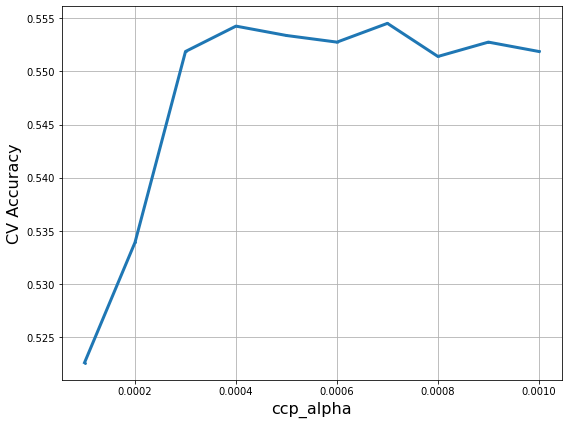

Best ccp_alpha {'ccp_alpha': 0.0007}


In [105]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [110]:
y_prob = dtc_cv.predict_proba(X_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)

cm_tree = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm_lda)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[2550 1623]
 [1939 2137]]

Accuracy: 0.5504909686022548


In [111]:
print('TPR',cm_tree[1][1]/(cm_tree[1][1]+cm_tree[0][1]))
print('FPR',cm_tree[1][0]/(cm_tree[1][0]+cm_tree[0][0]))

TPR 0.5751633986928104
FPR 0.45992070332701257


In [114]:
def TPR(L) :
    return L[1][1]/(L[1][1]+L[0][1])
def FPR(L) :
    return L[1][0]/(L[1][0]+L[0][0])

In [121]:
#Bootstraping the testing set
L_tpr_tree = []
L_tpr_reg = []
for i in range(100) :
    index = np.random.choice(X_test.index, len(X_test.index), replace=True)
    data = X_test.loc[index]
    y_test_boot = y_test.loc[index]
    predict_tree = dtc_cv.predict(data)
    predict_log_reg = log_reg.predict(data)
    cm_tree = confusion_matrix(y_test_boot,predict_tree)
    cm_log_reg = confusion_matrix(y_test_boot,predict_log_reg)
    tpr_tree = TPR(cm_tree)
    tpr_log_reg = TPR(cm_log_reg)
    fpr_tree = FPR(cm_tree)
    fpr_log_reg = FPR(cm_log_reg)
    L_tpr_tree.append(abs(tpr_tree))
    L_tpr_reg.append(abs(tpr_log_reg))

In [123]:
mean_tpr_tree = 1/len(L_tpr_tree)*sum(L_tpr_tree)
mean_tpr_reg = 1/len(L_tpr_reg)*sum(L_tpr_reg)
var_tpr_tree = sum((L_tpr_tree-mean_tpr_tree)**2)
var_tpr_reg = sum((L_tpr_reg-mean_tpr_reg)**2)
print(mean_tpr_tree,var_tpr_tree)
print(mean_tpr_reg,var_tpr_reg)

0.5760800219603567 0.012276149003870394
0.5657606813695771 0.007502595301404488
